# Dependency Analysis for Regression

# Regression No. 1

In [74]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Load Excel File
data = pd.read_excel('../data/final_dataset_1.xlsx')

# Set regression target
target = "No of Purchases"
#target = "daily_coffee_cups"

# Drop target + ID
X = data.drop(columns=[target, "CustomerID"])
y = data[target]

# Split numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# ---------- MUTUAL INFORMATION ----------
mi = mutual_info_regression(X_encoded, y)
mi_series = pd.Series(mi, index=X_encoded.columns)

# ---------- PEARSON CORRELATION ----------
# correlation only works with numeric features, so we use encoded X
corr_series = X_encoded.corrwith(y)

# ---------- COMBINE INTO ONE TABLE ----------
result_table = pd.DataFrame({
    "MutualInfo": mi_series,
    "Correlation": corr_series
})

# sort by MI
result_table = result_table.sort_values(by="MutualInfo", ascending=False)

print(result_table)


                                  MutualInfo  Correlation
LoyaltyPoints                       0.915368    -0.913990
Age                                 0.792714    -0.887425
CSAT                                0.487282    -0.783686
Impressions                         0.412004     0.748482
daily_coffee_cups                   0.304753    -0.685471
CES                                 0.247048     0.620008
Recommendation_Score                0.218367    -0.580041
Conversions                         0.109156     0.442354
AdViewFrequency                     0.076992    -0.381182
CartlistAddition                    0.066467     0.375252
WebsiteVisits                       0.064433    -0.356215
AnnualIncome                        0.051708     0.309288
Clicks                              0.028702    -0.244938
Customer_lifetime_Value             0.017774     0.017735
product_category_Electronics        0.016827    -0.014221
Sun_Sign_Capricorn                  0.016286     0.020096
CustomerLoyalt

In [75]:
# Zielvariable entfernen

# Mutual Information top 3
# LoyaltyPoints                       0.893691
# Age                                 0.772739
# CSAT                                0.475547

top3_features = result_table["MutualInfo"].sort_values(ascending=False).head(3).index.tolist()
top3_features_corr = result_table["Correlation"].sort_values(ascending=False).head(3).index.tolist()



#top3_features = mi_series.sort_values(ascending=False).head(3).index.tolist()
print(f"Top 3 Features by Mutual Information are: \n{'-'*50} \n{top3_features}")
print("\n")
print(f"Top 3 Features by Correlation are: \n{'-'*50} \n{top3_features_corr}")

Top 3 Features by Mutual Information are: 
-------------------------------------------------- 
['LoyaltyPoints', 'Age', 'CSAT']


Top 3 Features by Correlation are: 
-------------------------------------------------- 
['Impressions', 'CES', 'Conversions']


In [78]:
# num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

top3_features = ['LoyaltyPoints', 'Age', 'CSAT']
#top3_features = ['Impressions', 'Recommendation_Score', 'CSAT']

num_cols = data[top3_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data[top3_features].select_dtypes(include=['object', 'category']).columns.tolist()



num_cols = [c for c in num_cols if c != 'No of Purchases']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

model = Pipeline(steps=[
    ('prep', preprocess),
    ('reg', LinearRegression())
])

X = data[num_cols + cat_cols]
y = data[target]

model.fit(X, y)
y_pred = model.predict(X)
resid = y - y_pred

print("R-squared:", model.score(X, y))


R-squared: 0.9149398896544383


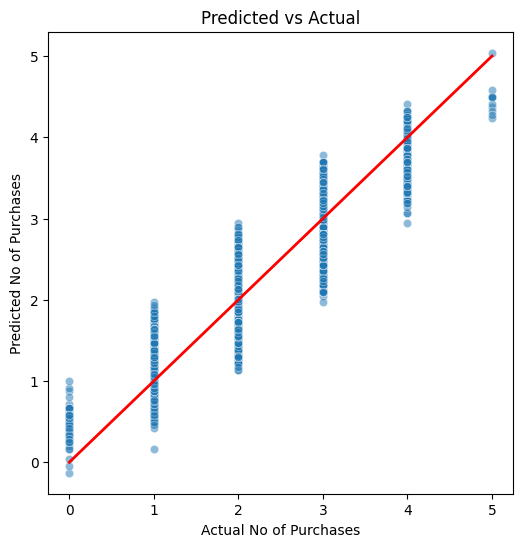

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual No of Purchases")
plt.ylabel("Predicted No of Purchases")
plt.title("Predicted vs Actual")
plt.show()


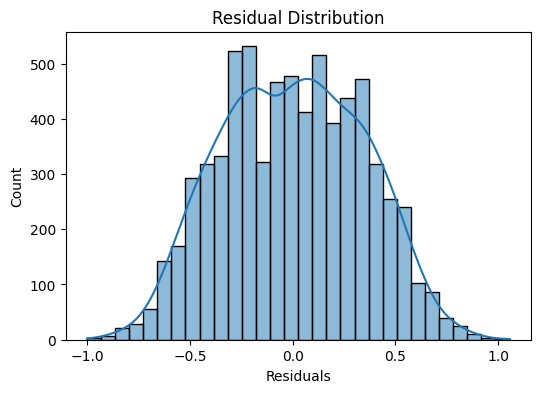

In [73]:
plt.figure(figsize=(6,4))
sns.histplot(resid, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


# Regression No. 2

In [79]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Load Excel File
data = pd.read_excel('../data/final_dataset_1.xlsx')

# Set regression target
# target = "No of Purchases"
target = "daily_coffee_cups"

# Drop target + ID
X = data.drop(columns=[target, "CustomerID"])
y = data[target]

# Split numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# ---------- MUTUAL INFORMATION ----------
mi = mutual_info_regression(X_encoded, y)
mi_series = pd.Series(mi, index=X_encoded.columns)

# ---------- PEARSON CORRELATION ----------
# correlation only works with numeric features, so we use encoded X
corr_series = X_encoded.corrwith(y)

# ---------- COMBINE INTO ONE TABLE ----------
result_table = pd.DataFrame({
    "MutualInfo": mi_series,
    "Correlation": corr_series
})

# sort by MI
result_table = result_table.sort_values(by="MutualInfo", ascending=False)

print(result_table)


                                  MutualInfo  Correlation
Impressions                         0.746998    -0.875754
Recommendation_Score                0.448603     0.764360
CSAT                                0.386686     0.729221
WebsiteVisits                       0.383005     0.733689
No of Purchases                     0.322051    -0.685471
AdViewFrequency                     0.231939     0.598255
LoyaltyPoints                       0.149688     0.507132
WishlistAddition                    0.107621     0.442402
Age                                 0.076286     0.383082
AnnualIncome                        0.073777    -0.376493
Clicks                              0.020701     0.193730
SeasonalityFactor_Spring            0.017074     0.018048
CES                                 0.016850    -0.244248
ReferralSource_Referral             0.015290    -0.017945
CartlistAddition                    0.014615    -0.228275
MarketingChannel_Email Marketing    0.013736    -0.016197
BounceRate    

In [81]:
# Zielvariable entfernen

# Mutual Information top 3
# LoyaltyPoints                       0.893691
# Age                                 0.772739
# CSAT                                0.475547

top3_features = result_table["MutualInfo"].sort_values(ascending=False).head(3).index.tolist()
top3_features_corr = result_table["Correlation"].sort_values(ascending=False).head(3).index.tolist()



#top3_features = mi_series.sort_values(ascending=False).head(3).index.tolist()
print(f"Top 3 Features by Mutual Information are: \n{'-'*50} \n{top3_features}")
print("\n")
print(f"Top 3 Features by Correlation are: \n{'-'*50} \n{top3_features_corr}")

Top 3 Features by Mutual Information are: 
-------------------------------------------------- 
['Impressions', 'Recommendation_Score', 'CSAT']


Top 3 Features by Correlation are: 
-------------------------------------------------- 
['Recommendation_Score', 'WebsiteVisits', 'CSAT']


In [82]:
# num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

#top3_features = ['LoyaltyPoints', 'Age', 'CSAT']
top3_features = ['Impressions', 'Recommendation_Score', 'CSAT']

num_cols = data[top3_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data[top3_features].select_dtypes(include=['object', 'category']).columns.tolist()



num_cols = [c for c in num_cols if c != 'No of Purchases']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

model = Pipeline(steps=[
    ('prep', preprocess),
    ('reg', LinearRegression())
])

X = data[num_cols + cat_cols]
y = data[target]

model.fit(X, y)
y_pred = model.predict(X)
resid = y - y_pred

print("R-squared:", model.score(X, y))


R-squared: 0.8065806291059682


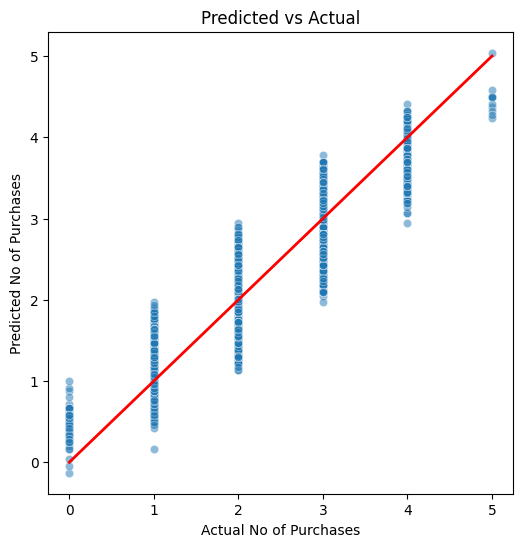

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel("Actual No of Purchases")
plt.ylabel("Predicted No of Purchases")
plt.title("Predicted vs Actual")
plt.show()


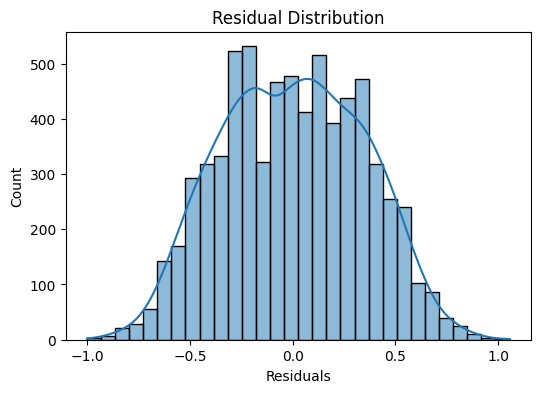

In [84]:
plt.figure(figsize=(6,4))
sns.histplot(resid, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


# Garbage Collection

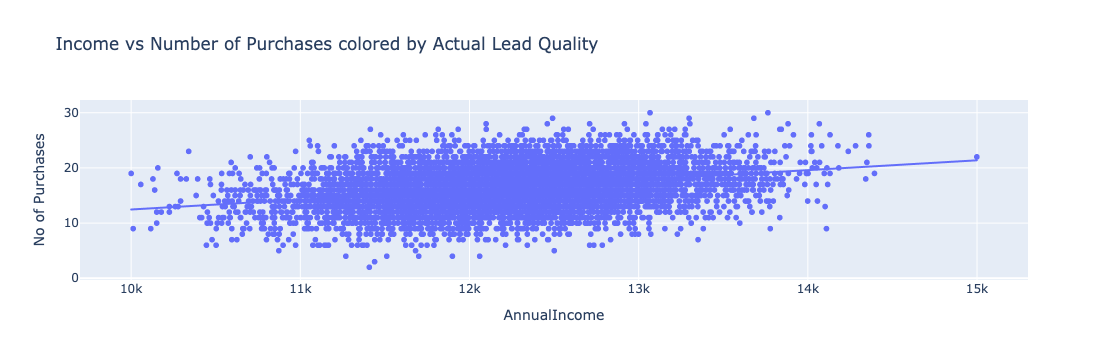

In [32]:
import plotly.express as px
fig = px.scatter(data, x='AnnualIncome', y='No of Purchases',
                 title='Income vs Number of Purchases colored by Actual Lead Quality', trendline='ols')
fig.show()

# Dependency Analysis for Classification

In [109]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load Excel File
data = pd.read_excel('../data/final_dataset_1.xlsx')


# Calculate Mutual Information
target = "CSAT"
# target = "Recommendation_Score"
# target = "CES"

# Encoding needed for non numerical targets
# target = "DeviceType"
# le = LabelEncoder()
# y = le.fit_transform(data[target])


X = data.drop(target, axis=1)
# drop CustomerID
X = X.drop("CustomerID", axis=1)

# Split numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

y = data[target]
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_series)


Mutual Information Scores:
Impressions                         0.507942
No of Purchases                     0.477475
daily_coffee_cups                   0.392035
LoyaltyPoints                       0.265880
Recommendation_Score                0.228827
Age                                 0.218788
WebsiteVisits                       0.198180
CES                                 0.119265
AdViewFrequency                     0.090228
Clicks                              0.052670
WishlistAddition                    0.042769
AnnualIncome                        0.034931
CartlistAddition                    0.025490
Conversions                         0.024521
product_category_Sports             0.014549
SeasonalityFactor_Summer            0.013765
DeviceType_Tablet                   0.009614
subscription_type_Intermediate      0.008894
BounceRate                          0.008572
ActualLeadQuality_Medium            0.006661
SuccessfulConversion                0.005541
Sun_Sign_Capricorn          

# Best Classification Targets

**CES**
<br />
Mutual Information Scores: <br />
Conversions                         0.543598 <br />
Age                                 0.423468 <br />
Clicks                              0.339316 <br />
No of Purchases                     0.249171 <br />

**Recommendation_Score** 
<br />
Mutual Information Scores: <br />
AdViewFrequency                     0.710651 <br />
AnnualIncome                        0.440162 <br />
daily_coffee_cups                   0.434658 <br />
Impressions                         0.358647 <br />


**CSAT**
<br />
Mutual Information Scores: <br />
Impressions                         0.507942 <br />
No of Purchases                     0.477475 <br />
daily_coffee_cups                   0.392035 <br />
LoyaltyPoints                       0.265880 <br />



# Classification No. 1

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, classification_report
)

# --- Load your data ---
data = pd.read_excel('../data/final_dataset_1.xlsx')

# --- Target (categorical) ---
target = "Recommendation_Score"
y = data[target]

# Encode the target if it is categorical text
# le = LabelEncoder()
# y = le.fit_transform(y)

# --- Select features ---
X = data[["AdViewFrequency"]]


# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# --- Predict ---
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred, average="weighted"))


              precision    recall  f1-score   support

           3       0.75      0.38      0.50         8
           4       0.72      0.32      0.44        73
           5       0.64      0.53      0.58       290
           6       0.66      0.70      0.68       520
           7       0.65      0.75      0.70       387
           8       0.59      0.66      0.62       109
           9       0.67      0.15      0.25        13

    accuracy                           0.65      1400
   macro avg       0.67      0.50      0.54      1400
weighted avg       0.65      0.65      0.64      1400

Accuracy: 0.6485714285714286
F1: 0.6413071088117185


In [123]:
import itertools

clf = model   # model *is* LogisticRegression

coef = clf.coef_        # shape: (n_classes, 1)
intercept = clf.intercept_
classes = clf.classes_

boundaries = []

for (i, cls_i), (j, cls_j) in itertools.combinations(enumerate(classes), 2):
    wi, bi = coef[i][0], intercept[i]
    wj, bj = coef[j][0], intercept[j]

    if wi == wj:
        continue

    x_boundary = (bj - bi) / (wi - wj)
    boundaries.append((cls_i, cls_j, x_boundary))

boundaries


[(3, 4, 2.3725941537069),
 (3, 5, 4.081332839197201),
 (3, 6, 5.723311280952293),
 (3, 7, 7.256268678518368),
 (3, 8, 8.933449109203023),
 (3, 9, 10.554284826789587),
 (3, 10, 10.528380839922123),
 (4, 5, 5.789390154645342),
 (4, 6, 7.352304887933343),
 (4, 7, 8.843844711306389),
 (4, 8, 10.491615460119466),
 (4, 9, 12.098730808902406),
 (4, 10, 12.220514944960607),
 (5, 6, 8.832191398931895),
 (5, 7, 10.315901913562115),
 (5, 8, 11.956964084101818),
 (5, 9, 13.567597553165937),
 (5, 10, 13.904981061434),
 (6, 7, 11.853861612795669),
 (6, 8, 13.489861670987594),
 (6, 9, 15.111487117611976),
 (6, 10, 15.844803835705875),
 (7, 8, 14.959752784299207),
 (7, 9, 16.60626424757446),
 (7, 10, 18.177740611425683),
 (8, 9, 18.324848760551717),
 (8, 10, 24.170251253999883),
 (9, 10, 10.869893522678396)]

In [124]:
adjacent_boundaries = []

for i in range(len(classes)-1):
    cls_i = classes[i]
    cls_j = classes[i+1]
    
    wi, bi = coef[i][0], intercept[i]
    wj, bj = coef[i+1][0], intercept[i+1]

    boundary = (bj - bi) / (wi - wj)
    adjacent_boundaries.append((cls_i, cls_j, boundary))


adjacent_boundaries_sorted = sorted(adjacent_boundaries, key=lambda x: x[2])
adjacent_boundaries


[(3, 4, 2.3725941537069),
 (4, 5, 5.789390154645342),
 (5, 6, 8.832191398931895),
 (6, 7, 11.853861612795669),
 (7, 8, 14.959752784299207),
 (8, 9, 18.324848760551717),
 (9, 10, 10.869893522678396)]

In [125]:
print(clf.classes_)


[ 3  4  5  6  7  8  9 10]


# Classification No. 2

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, classification_report
)

# --- Load your data ---
data = pd.read_excel('../data/final_dataset_1.xlsx')

# --- Target (categorical) ---
target = "CES"
y = data[target]

# Encode the target if it is categorical text
# le = LabelEncoder()
# y = le.fit_transform(y)

# --- Select features ---
X = data[["Conversions"]]


# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

# --- Predict ---
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred, average="weighted"))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.64      0.23      0.34        30
           3       0.77      0.41      0.53       304
           4       0.62      0.96      0.76       677
           5       0.75      0.37      0.50       347
           6       0.56      0.14      0.22        37
           7       0.00      0.00      0.00         3

    accuracy                           0.66      1400
   macro avg       0.48      0.30      0.34      1400
weighted avg       0.68      0.66      0.62      1400

Accuracy: 0.6557142857142857
F1: 0.6187767972304331


/Users/ludwigopulski/venvs/manim/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ludwigopulski/venvs/manim/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/ludwigopulski/venvs/manim/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [117]:
import itertools

clf = model   # model *is* LogisticRegression

coef = clf.coef_        # shape: (n_classes, 1)
intercept = clf.intercept_
classes = clf.classes_

boundaries = []

for (i, cls_i), (j, cls_j) in itertools.combinations(enumerate(classes), 2):
    wi, bi = coef[i][0], intercept[i]
    wj, bj = coef[j][0], intercept[j]

    if wi == wj:
        continue

    x_boundary = (bj - bi) / (wi - wj)
    boundaries.append((cls_i, cls_j, x_boundary))

boundaries


[(1, 2, -5.748311480907975),
 (1, 3, 0.5852895361408704),
 (1, 4, 2.075328509376656),
 (1, 5, 3.2516211299202418),
 (1, 6, 4.431720952005358),
 (1, 7, 5.159050086347415),
 (2, 3, 1.899113289964368),
 (2, 4, 2.907709174178779),
 (2, 5, 3.90410429829988),
 (2, 6, 4.9812122600172914),
 (2, 7, 5.677930602545849),
 (3, 4, 3.969696861543978),
 (3, 5, 4.98133042449685),
 (3, 6, 6.065298494019548),
 (3, 7, 6.802403002225533),
 (4, 5, 6.035354356166742),
 (4, 6, 7.116494764613707),
 (4, 7, 7.91833578460627),
 (5, 6, 8.120269342082),
 (5, 7, 9.063153458831),
 (6, 7, 10.852011787260313)]

In [120]:
adjacent_boundaries = []

for i in range(len(classes)-1):
    cls_i = classes[i]
    cls_j = classes[i+1]
    
    wi, bi = coef[i][0], intercept[i]
    wj, bj = coef[i+1][0], intercept[i+1]

    boundary = (bj - bi) / (wi - wj)
    adjacent_boundaries.append((cls_i, cls_j, boundary))


adjacent_boundaries_sorted = sorted(adjacent_boundaries, key=lambda x: x[2])
adjacent_boundaries


[(1, 2, -5.748311480907975),
 (2, 3, 1.899113289964368),
 (3, 4, 3.969696861543978),
 (4, 5, 6.035354356166742),
 (5, 6, 8.120269342082),
 (6, 7, 10.852011787260313)]